$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\yv}{\mathbf{y}}
 \newcommand{\zv}{\mathbf{z}}
 \newcommand{\uv}{\mathbf{u}}
 \newcommand{\vv}{\mathbf{v}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Zm}{\mathbf{Z}}
 \newcommand{\I}{\mathbf{I}}
 \newcommand{\Um}{\mathbf{U}}
 \newcommand{\Vm}{\mathbf{V}} 
 \newcommand{\muv}{\boldsymbol\mu}
 \newcommand{\Sigmav}{\boldsymbol\Sigma}
 \newcommand{\Lambdav}{\boldsymbol\Lambda}
$

# House Price Predictor


### ITCS 5156 Project

<br/>

NAME: Jose Salas-Ayala

</b> </font>

Step 1: Data Cleaning
The data that will be used is the same as the following reference research paper: T. D. Phan, "Housing Price Prediction Using Machine Learning Algorithms: The Case of Melbourne City, Australia," 2018 International Conference on Machine Learning and Data Engineering (iCMLDE), Sydney, NSW, Australia, 2018, pp. 35-42, doi: 10.1109/iCMLDE.2018.00017.


In [10]:
#import the neccassry libraries 
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import sklearn



The model selected will be a simple linear regression. This is because this model tends to work best as a basis to compare the accuracy of other models. It may not be able to capture the true curve for the best predictions but it will consistently give good predictions.

In [11]:
# Import the data

df = pd.read_csv('Melbourne_housing_FULL.csv')

#check the first 5 entries
df.head(5)
#df.shape

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


Data Cleaning: Recreating from the paper, where columns with %55 missing data are removed and rows with missing "Price" values are removed

In [25]:
# # from mlxtend.feature_selection import SequentialFeatureSelector
# # from sklearn.linear_model import LinearRegression
# # estimator = LinearRegression()
# # selector = SequentialFeatureSelector(estimator, 
# #                                       scoring='neg_mean_squared_error', 
# #                                       verbose=2, 
# #                                       k_features='best', 
# #                                       forward=False, 
# #                                       n_jobs=-1)

# # selected_features = X_train.columns[list(selector.k_feature_idx_)]
# target = 'Price'
# features = df.columns.drop(target)

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=0)

# # Define the estimator to use in the stepwise algorithm
# estimator = LinearRegression()

# # Define the stepwise selector, using the backward elimination method and the AIC criterion
# selector = SequentialFeatureSelector(estimator, 
                                      
#                                       scoring='neg_mean_squared_error', 
#                                       verbose=2, 
#                                       k_features='best', 
#                                       forward=False, 
#                                       n_jobs=-1)

# # Fit the selector to the training data
# selector.fit(X_train, y_train)

# # Get the selected features and the final model
# selected_features = X_train.columns[list(selector.k_feature_idx_)]



# # Print the selected features and the model performance
# print('Selected Features:', selected_features)


C:\Users\emman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\emman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\emman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-package

Selected Features: Index(['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount'],
      dtype='object')


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished

[2023-04-28 23:33:46] Features: 2/1 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.1s finished

[2023-04-28 23:33:46] Features: 1/1 -- score: nan

In [13]:
missing_percentage = df.isna().mean()
#columns_to_drop = missing_percentage[missing_percentage > 0.55].index
df_housing = df.drop(columns=['Suburb','Address','Method','SellerG','Date','Postcode','Bedroom2','CouncilArea','Regionname','BuildingArea','YearBuilt'])
df_housing= df_housing.dropna(subset=['Price'])
df_housing= df_housing.dropna(subset=['Lattitude']) #in the paper they used googlemaps API to fill in the missing values but I didn't want to buy a key so I just dropped it instead.
df_housing = df_housing.dropna(thresh=6)
#matching the data in the reference paper leaves us with 11 variables



#imputations

grouped_df = df.groupby(['Type'])['Landsize'].median().reset_index()

# Function to impute missing values based on median values group by house types and suburbs
def impute_landsize(row):
    if pd.isnull(row['Landsize']):
        median_val = grouped_df.loc[(grouped_df['Type']==row['Type']) , 'Landsize'].values
        if len(median_val) > 0:
            return median_val[0]
        else:
            return row['Landsize']
    else:
        return row['Landsize']

df_housing['Landsize'] = df.apply(impute_landsize,axis=1)

#change NAN to 0 for bathrooms and carports
df_housing['Bathroom'] = df_housing['Bathroom'].fillna(0)
df_housing['Car'] = df_housing['Car'].fillna(0)

df_housing.head(5)
df_housing.shape
df_housing.describe()

,Rooms,Price,Distance,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
count,20993.000000,2.099300e+04,20993.000000,20993.000000,20993.000000,20993.000000,20993.000000,20993.000000,20993.000000
mean,3.059163,1.089746e+06,11.359020,1.575001,1.666889,571.868147,-37.806963,144.996711,7516.751489
std,0.949881,6.530283e+05,6.891418,0.715417,1.020688,3478.854327,0.091619,0.120680,4411.397778
min,1.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.570000e+05,6.400000,1.000000,1.000000,216.000000,-37.860900,144.925300,4380.000000
50%,3.000000,9.100000e+05,10.400000,1.000000,2.000000,541.000000,-37.800460,145.003200,6567.000000
75%,4.000000,1.335000e+06,14.200000,2.000000,2.000000,645.000000,-37.748970,145.068770,10331.000000
max,16.000000,1.120000e+07,48.100000,9.000000,18.000000,433014.000000,-37.397800,145.526350,21650.000000


After Datacleaning its time to use feature selection.
The research paper uses the following 11 variables to build its model.
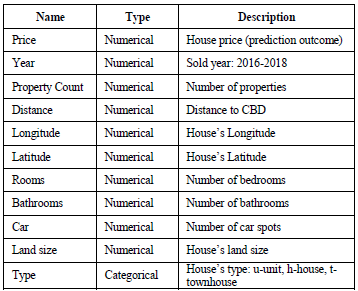

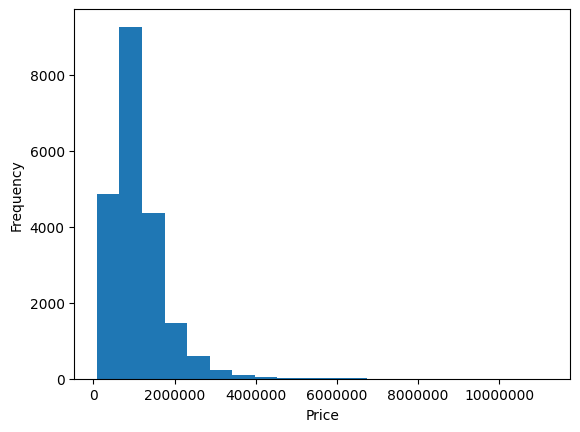

In [14]:
#Histogram of price
plt.hist(df_housing['Price'],bins=20)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

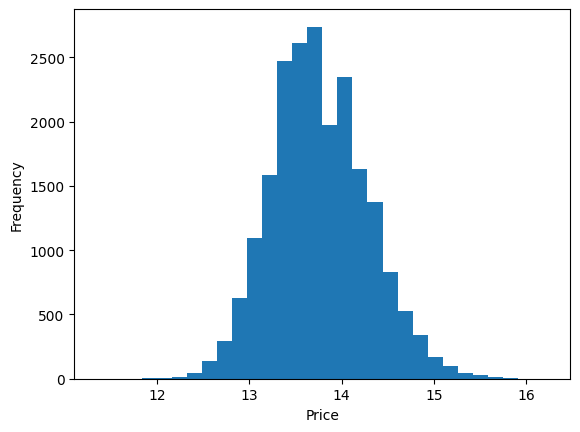

In [15]:
log_price = np.log(df_housing['Price'])

plt.hist(log_price, bins= 30)

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

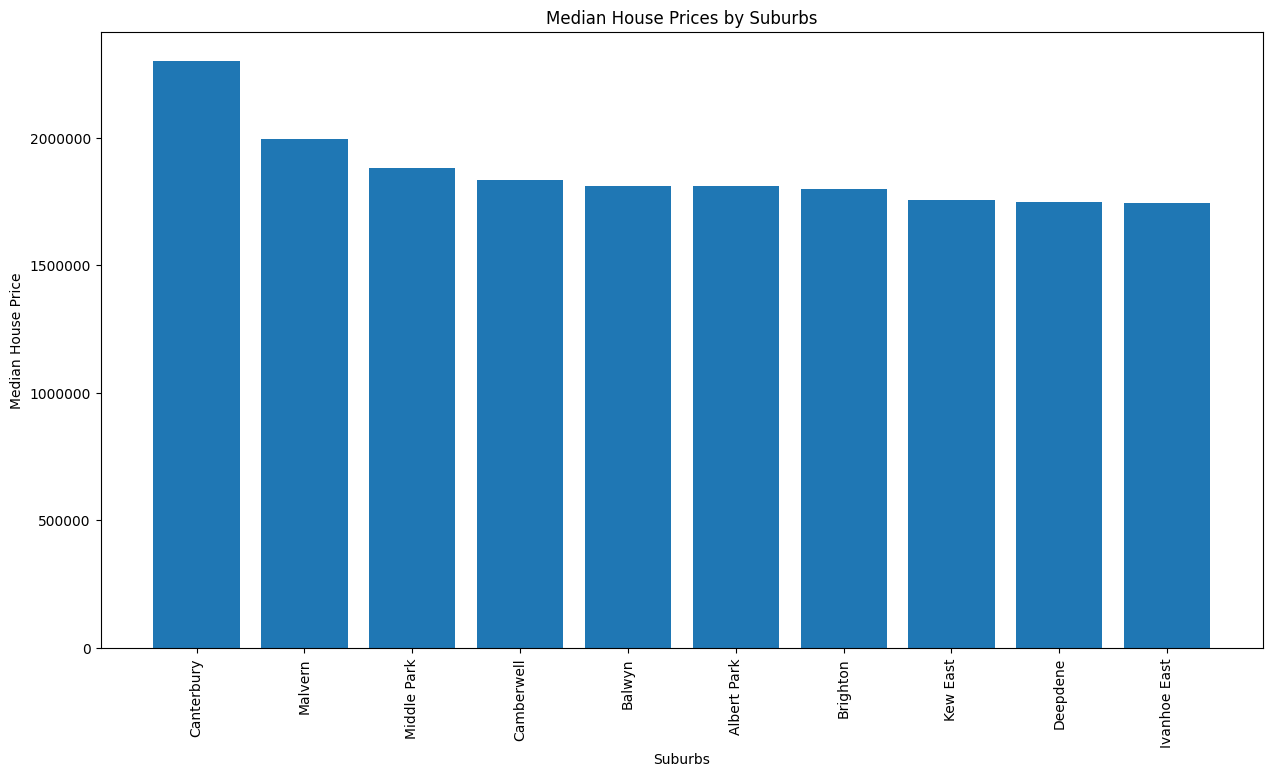

In [16]:
# create a dataframe with median house prices by suburbs
df_median_prices = df.groupby('Suburb')['Price'].median().reset_index().sort_values('Price', ascending=False)
most_expensive = df_median_prices[:10]

# plot a bar chart of the median house prices by suburbs
plt.figure(figsize=(15,8))
plt.bar(most_expensive['Suburb'], most_expensive['Price'])
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Suburbs')
plt.ylabel('Median House Price')
plt.title('Median House Prices by Suburbs')
plt.show()

The paper implements several different regression models to find useful ones such as Stepwise, Linear Rgresssion, Polynomial Regression, Regression Tree, Neural Network, SVM

In [17]:
df_housing = pd.get_dummies(df_housing, columns=['Type'])

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA

scaler = StandardScaler()
df_housing[['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize']] = scaler.fit_transform(df_housing[['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize']])

X = df_housing.drop('Price', axis=1)
target=df_housing['Price']

#split data
X_train, X_test, t_train, t_test = train_test_split(X,target,test_size=0.2)

#starting off with linear regression which is used as the baseline
linear_reg = LinearRegression(normalize=True)

linear_reg.fit(X_train,t_train)

t_pred =linear_reg.predict(X_test)

mse = mean_squared_error(t_test,t_pred)
training_score=linear_reg.score(X_train,t_train)
test_score = linear_reg.score(X_test,t_test)
print(f"Train score: {training_score}")
print(f"Test score: {test_score}")

y = linear_reg.predict(X_test)
r2 = r2_score(t_test, y_pred)
print(f"MSE: {mse}")


Train score: 0.5139061778360234
Test score: 0.5011126626911651


C:\Users\emman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


NameError: name 'r2_score' is not defined

Data Reduction and Transformation

In [ ]:
predictors = X_train.columns
print(predictors)

coef = pd.Series(linear_reg.coef_,predictors).sort_values()
print(coef)

In [ ]:
y_pred = linear_reg.predict(X_test)

df_pred_actual=pd.DataFrame({'predicted': y_pred, 'actual':t_test})
df_pred_actual.head(10)

Model evaluations

In [ ]:
from sklearn.metrics import r2_score
print("Testing_score: ",r2_score(t_test,y_pred))

fig, ax =plt.subplots(figsize=(12,8))
plt.title("R2 Score")
plt.scatter(t_test,y_pred)
plt.show()

Using and evaluating other models
Poly Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_reg = LinearRegression().fit(X_train_poly, t_train)


y_pred_poly = poly_reg.predict(X_test_poly)

mse_poly = mean_squared_error(t_test, y_pred)
r2_poly = r2_score(t_test, y_pred)
training_score_poly=poly_reg.score(X_train_poly,t_train)
test_score_poly = poly_reg.score(X_test_poly,t_test)
print(f"Train score: {training_score_poly}")
print(f"Test score: {test_score_poly}")
print(f"MSE: {mse_poly}")
print(f"R-squared score: {r2_poly}")

Regression Tree


In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, t_train)

t_pred = tree_reg.predict(X_test)

training_score_tree=tree_reg.score(X_train,t_train)
test_score_tree = tree_reg.score(X_test,t_test)

mse_tree = mean_squared_error(t_test, t_pred)
r2_tree = r2_score(t_test, t_pred)

print(f"Train score: {training_score_tree}")
print(f"Test score: {test_score_tree}")
print(f"MSE: {mse_tree}")
print(f"R-squared score: {r2_tree}")

Neural Network

In [ ]:
from sklearn.neural_network import MLPRegressor

scaler = StandardScaler()
X_train_neural = scaler.fit_transform(X_train)
X_test_neural = scaler.transform(X_test)

neural_model = MLPRegressor(hidden_layer_sizes=(50,50,50), max_iter=1000)

neural_model.fit(X_train, t_train)
y_pred = neural_model.predict(X_test)


mse_nn = mean_squared_error(t_test, y_pred)
r2_nn = r2_score(t_test, y_pred)

training_score_neural=neural_model.score(X_train,t_train)
test_score_neural = neural_model.score(X_test,t_test)

print(f"Train score: {training_score_neural}")
print(f"Test score: {test_score_neural}")
print(f"MSE: {mse_nn}")
print(f"R-squared score: {r2_nn}")


SVM

In [ ]:
from sklearn.svm import SVR
svm_reg = SVR(kernel='linear')
svm_reg.fit(X_train, t_train)

y_pred = svm_reg.predict(X_test)

mse_svm = mean_squared_error(t_test, y_pred)
r2_svm = r2_score(t_test, y_pred)

training_score_svm=svm_reg.score(X_train,t_train)
test_score_svm = svm_reg.score(X_test,t_test)

print(f"Train score: {training_score_svm}")
print(f"Test score: {test_score_svm}")
print(f"MSE: {mse_svm}")
print(f"R-squared score: {r2_svm}")

In [ ]:
# from sklearn.decomposition import PCA
# from sklearn.svm import SVC
# from sklearn.pipeline import make_pipeline

# pca = PCA(n_components=10) 
# svm_pca = SVC(kernel='linear', C=1.0)
# svm_pipe = make_pipeline(pca, svm_pca)
# svm_pipe.fit(X_train, t_train)

# score = svm_pipe.score(X_test, t_test)
# print(score)

Prediction Results:

In [ ]:
scores = {
    'Linear Regression': [training_score, test_score, mse, r2],
    'Polynomial Regression': [training_score_poly, test_score_poly, mse_poly, r2_poly],
    'Regression Tree': [training_score_tree, test_score_tree, mse_tree, r2_tree],
    'Neural Network': [training_score_neural, test_score_neural, mse_nn, r2_nn],
    'Support Vector Machine': [training_score_svm, test_score_svm, mse_svm, r2_svm]
}
df_scores = pd.DataFrame(scores, index=['Train Score', 'Test Score', 'MSE', 'R-squared'])

print(df_scores.to_string(float_format="{:.5f}".format))


Conclusion:
It seems that the regression tree had the overall best performance of the models but it is far from perfect and not nearly as good as the ones obtain in the research paper. Perhaps there was a mistake made during the preprocessing phase or with the selection of features. In either case 